In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import re
from wordcloud import WordCloud, STOPWORDS
np.set_printoptions(suppress=True)

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
data = pd.read_csv('Global YouTube Statistics.csv', encoding = 'latin-1')

In [5]:
data.reset_index(drop= True, inplace= True)

In [6]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [7]:
data.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [9]:
data.shape

(995, 28)

In [10]:
data.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [11]:
#clean columns in the dataset
data.columns = data.columns.str.replace('_',' ')
data.columns = data.columns.str.title()
data.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

In [12]:
youtube = data[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Country', 'Abbreviation', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']]

In [13]:
youtube.head(10)

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,YouTube Movies,170000000,0.000000e+00,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,3.282395e+08,270663028.0,2006.0
2,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,3.282395e+08,270663028.0,2012.0
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,3.282395e+08,270663028.0,2006.0
4,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
5,Music,119000000,0.000000e+00,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
6,ýýý Kids Diana Show,112000000,9.324704e+10,1111,People & Blogs,United States,US,182900.0,2900000.00,88.2,14.70,3.282395e+08,270663028.0,2015.0
7,PewDiePie,111000000,2.905804e+10,4716,Gaming,Japan,JP,9800.0,156700.00,63.2,2.29,1.262266e+08,115782416.0,2010.0
8,Like Nastya,106000000,9.047906e+10,493,People & Blogs,Russia,RU,12200.0,195800.00,81.9,4.59,1.443735e+08,107683889.0,2016.0
9,Vlad and Niki,98900000,7.718017e+10,574,Entertainment,United States,US,145100.0,2300000.00,88.2,14.70,3.282395e+08,270663028.0,2018.0


In [14]:
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'

#Youtuber feature
youtube['Youtuber'] = youtube['Youtuber'].apply(lambda x: re.sub(pattern, '', x)) 
youtube['Youtuber'] = youtube['Youtuber'].str.strip() 
youtube['Youtuber'] = youtube['Youtuber'].str.lstrip('- ')

In [15]:
filter_youtuber_rows = youtube['Youtuber'].str.contains(pattern, regex = True)
filter_youtuber_rows_results = filter_youtuber_rows[filter_youtuber_rows == True]
print("Youtuber's special characters:",filter_youtuber_rows_results)


Youtuber's special characters: Series([], Name: Youtuber, dtype: bool)


In [16]:
youtube.head()

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,2.280000e+11,20082,Music,India,IN,564600.0,9000000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0
1,YouTube Movies,170000000,0.000000e+00,1,Film & Animation,United States,US,0.0,0.05,88.2,14.70,3.282395e+08,270663028.0,2006.0
2,MrBeast,166000000,2.836884e+10,741,Entertainment,United States,US,337000.0,5400000.00,88.2,14.70,3.282395e+08,270663028.0,2012.0
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,966,Education,United States,US,493800.0,7900000.00,88.2,14.70,3.282395e+08,270663028.0,2006.0
4,SET India,159000000,1.480000e+11,116536,Shows,India,IN,455900.0,7300000.00,28.1,5.36,1.366418e+09,471031528.0,2006.0


In [17]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    float64
 3   Uploads                                  995 non-null    int64  
 4   Category                                 949 non-null    object 
 5   Country                                  873 non-null    object 
 6   Abbreviation                             873 non-null    object 
 7   Lowest Monthly Earnings                  995 non-null    float64
 8   Highest Monthly Earnings                 995 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  872 non-null    float64
 10  Unemployment Rate                        872 non-n

In [18]:
youtube.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category',
       'Country', 'Abbreviation', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)',
       'Unemployment Rate', 'Population', 'Urban Population', 'Created Year'],
      dtype='object')

In [19]:
#Remove data null in column 'Created Year'
youtube = youtube.dropna(subset= ['Created Year'])
youtube['Created Year'] = youtube['Created Year'].astype('object')
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 990 non-null    object 
 1   Subscribers                              990 non-null    int64  
 2   Video Views                              990 non-null    float64
 3   Uploads                                  990 non-null    int64  
 4   Category                                 944 non-null    object 
 5   Country                                  870 non-null    object 
 6   Abbreviation                             870 non-null    object 
 7   Lowest Monthly Earnings                  990 non-null    float64
 8   Highest Monthly Earnings                 990 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  869 non-null    float64
 10  Unemployment Rate                        869 non-n

In [20]:
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [21]:
youtube[youtube['Created Year'] == 1970]

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
101,YouTube,36300000,3.010785e+09,744,News & Politics,United States,US,5300.0,84400.0,88.2,14.7,328239523.0,270663028.0,1970.0


In [22]:
youtube[youtube['Youtuber'] == 'YouTube'] = youtube[youtube['Youtuber'] == 'YouTube'].replace(1970, 2005)
youtube[youtube['Youtuber'] == 'YouTube']

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
101,YouTube,36300000,3.010785e+09,744,News & Politics,United States,US,5300.0,84400.0,88.2,14.7,328239523.0,270663028.0,2005


In [23]:
youtube['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       2019.0, 2022.0], dtype=object)

In [24]:
blanks_data_youtuber = youtube[youtube['Youtuber'] == '']
blanks_data_youtuber

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
64,,43200000,3.645873e+10,1478,Film & Animation,Russia,RU,75900.0,1200000.0,81.9,4.59,144373535.0,107683889.0,2011.0
161,,30400000,1.799996e+10,532,NaN,United States,US,30700.0,491700.0,88.2,14.70,328239523.0,270663028.0,2018.0
433,,19000000,4.924054e+09,60,Education,United States,US,5400.0,86300.0,88.2,14.70,328239523.0,270663028.0,2018.0
447,,18800000,9.594189e+09,530,Entertainment,Ukraine,UA,17000.0,272000.0,82.7,8.88,44385155.0,30835699.0,2014.0
561,,16500000,2.440934e+09,421,Entertainment,United States,US,5500.0,87800.0,88.2,14.70,328239523.0,270663028.0,2014.0
606,,15900000,1.845330e+09,0,People & Blogs,Russia,RU,0.0,0.0,81.9,4.59,144373535.0,107683889.0,2017.0
632,,15500000,8.265130e+09,1021,Shows,Saudi Arabia,SA,33800.0,540100.0,68.0,5.93,34268528.0,28807838.0,2017.0
700,,14900000,4.390980e+05,1,People & Blogs,Russia,RU,2.0,31.0,81.9,4.59,144373535.0,107683889.0,2008.0
707,,14800000,7.018015e+09,2387,Howto & Style,Ukraine,UA,11800.0,188500.0,82.7,8.88,44385155.0,30835699.0,2015.0
714,,14700000,2.230986e+09,1385,Entertainment,Saudi Arabia,SA,673.0,10800.0,68.0,5.93,34268528.0,28807838.0,2016.0


In [25]:
youtube = youtube.drop(blanks_data_youtuber.index)
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Youtuber'] == '']

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year


In [26]:
#Check duplicate data
youtube.duplicated().sum()

0

In [27]:
#Check zero data video views
zero_views = youtube[youtube['Video Views'] == 0]
zero_views

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
1,YouTube Movies,170000000,0.0,1,Film & Animation,United States,US,0.0,0.05,88.2,14.7,328239523.0,270663028.0,2006.0
5,Music,119000000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
12,Gaming,93600000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
18,Sports,75000000,0.0,3,NaN,United States,US,0.0,0.06,88.2,14.7,328239523.0,270663028.0,2006.0
101,News,36300000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
171,Popular on YouTube,29300000,0.0,3,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2017.0
357,Minecraft - Topic,20900000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2013.0
584,Live,16100000,0.0,0,NaN,NaN,NaN,0.0,0.00,NaN,NaN,NaN,NaN,2015.0


In [28]:
#Remove zero data video views
youtube = youtube.drop(zero_views.index)
youtube.reset_index(drop= True, inplace= True)
youtube[youtube['Video Views'] == 0]

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year


In [29]:
youtube.shape

(966, 14)

In [30]:
#Check null/nan data
youtube.isnull().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                    37
Country                                    113
Abbreviation                               113
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    114
Unemployment Rate                          114
Population                                 114
Urban Population                           114
Created Year                                 0
dtype: int64

In [31]:
categorical_variables = youtube.select_dtypes(include= 'O').columns
youtube[categorical_variables] = youtube[categorical_variables].fillna('Other')

In [32]:
youtube.isna().sum()

Youtuber                                     0
Subscribers                                  0
Video Views                                  0
Uploads                                      0
Category                                     0
Country                                      0
Abbreviation                                 0
Lowest Monthly Earnings                      0
Highest Monthly Earnings                     0
Gross Tertiary Education Enrollment (%)    114
Unemployment Rate                          114
Population                                 114
Urban Population                           114
Created Year                                 0
dtype: int64

In [33]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    float64
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  852 non-null    float64
 10  Unemployment Rate                        852 non-n

In [39]:
youtube_not_null = youtube.dropna(subset= ['Gross Tertiary Education Enrollment (%)','Unemployment Rate', 'Population', 'Urban Population'])

#Mean Education Enrollment
mean_edu = round(youtube_not_null['Gross Tertiary Education Enrollment (%)'].mean(),1)
print('Mean Gross Tertiary Education Enrollment:', mean_edu)

#Mean Unemployment Rate
mean_unemp = round(youtube_not_null['Unemployment Rate'].mean(),1)
print('Mean Unemployment Rate:', mean_unemp)

#Mean Population
mean_popu = round(youtube_not_null['Population'].mean(),0)
print('Mean Population:', mean_popu)

#Mean Urban Population
mean_urban = round(youtube_not_null['Urban Population'].mean(),0)
print('Mean Urban Population:', mean_urban)

Mean Gross Tertiary Education Enrollment: 63.2
Mean Unemployment Rate: 9.3
Mean Population: 436369043.0
Mean Urban Population: 226156206.0


In [40]:
youtube['Gross Tertiary Education Enrollment (%)'] = youtube['Gross Tertiary Education Enrollment (%)'].fillna(mean_edu)
youtube['Unemployment Rate'] = youtube['Unemployment Rate'].fillna(mean_unemp)
youtube['Population'] = youtube['Population'].fillna(mean_popu)
youtube['Urban Population'] = youtube['Urban Population'].fillna(mean_urban)

In [41]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    float64
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  966 non-null    float64
 10  Unemployment Rate                        966 non-n

In [42]:
youtube = youtube.astype({
    'Video Views': 'int64',
    'Created Year': 'int64',
    'Population': 'int64',
    'Urban Population': 'int64'
})

# Validate results of datatype change
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    int64  
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  966 non-null    float64
 10  Unemployment Rate                        966 non-n

In [43]:
#sorting the dataframe and resetting index (by 'Subscribers)
youtube = youtube.sort_values(by = 'Subscribers', ascending= False).reset_index(drop= True)
youtube

,Youtuber,Subscribers,Video Views,Uploads,Category,Country,Abbreviation,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
0,T-Series,245000000,228000000000,20082,Music,India,IN,564600.0,9000000.0,28.1,5.36,1366417754,471031528,2006
1,MrBeast,166000000,28368841870,741,Entertainment,United States,US,337000.0,5400000.0,88.2,14.70,328239523,270663028,2012
2,Cocomelon - Nursery Rhymes,162000000,164000000000,966,Education,United States,US,493800.0,7900000.0,88.2,14.70,328239523,270663028,2006
3,SET India,159000000,148000000000,116536,Shows,India,IN,455900.0,7300000.0,28.1,5.36,1366417754,471031528,2006
4,Kids Diana Show,112000000,93247040539,1111,People & Blogs,United States,US,182900.0,2900000.0,88.2,14.70,328239523,270663028,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Natan por A,12300000,9029609749,1200,Sports,Brazil,BR,138100.0,2200000.0,51.3,12.08,212559417,183241641,2017
962,Free Fire India Official,12300000,1674409945,1500,People & Blogs,India,IN,16200.0,258900.0,28.1,5.36,1366417754,471031528,2018
963,Panda,12300000,2214684303,2452,Other,United Kingdom,GB,17.0,268.0,60.0,3.85,66834405,55908316,2006
964,RobTopGames,12300000,374123483,39,Gaming,Sweden,SE,968.0,15500.0,67.0,6.48,10285453,9021165,2012


In [45]:
youtube_color_barchart_10 = ['#f00000','#ff2424','#ff3838','#ff554f','#fb7571','#cccccc','#b6b6b6','#9e9e9e','#888888','#777777']

In [46]:
youtube_color_donutchart = ['#777777','#9e9e9e','#b6b6b6','#cccccc', '#fb7571', '#ff3838','#f00000']

In [ ]:
youtube_color_barchart_freestyle2 = ['#FE0000','#F4E0B9','#A8A196','#7D7463']

In [47]:
select_columns = ['Youtuber', 'Subscribers']

#Filter dataframe for top 10 most subscribers Youtuber channels
top_10_subs = youtube[select_columns].head(10)

#Convert 'Subscriber' in millions
top_10_subs['Subscribers (million)'] = (top_10_subs['Subscribers'] / 1000000).astype('int')
top_10_subs = top_10_subs[['Youtuber', 'Subscribers (million)']]

#Show dataframe
top_10_subs

,Youtuber,Subscribers (million)
0,T-Series,245
1,MrBeast,166
2,Cocomelon - Nursery Rhymes,162
3,SET India,159
4,Kids Diana Show,112
5,PewDiePie,111
6,Like Nastya,106
7,Vlad and Niki,98
8,Zee Music Company,96
9,WWE,96


In [48]:
#Select columns to show output
select_columns = ['Youtuber', 'Video Views']

#Filter dataframe for top 10 most video views Youtuber channels
youtube_videoviews = youtube[select_columns]
top_10_views = youtube_videoviews.sort_values(by = 'Video Views', ascending= False).head(10)

#Convert 'Video Views' in billions
top_10_views['Video Views (billion)'] = (top_10_views['Video Views'] / 1000000000).astype('int')
top_10_views = top_10_views[['Youtuber', 'Video Views (billion)']].sort_values(by= 'Video Views (billion)', ascending= False).reset_index(drop=True)

#Show dataframe
top_10_views

,Youtuber,Video Views (billion)
0,T-Series,228
1,Cocomelon - Nursery Rhymes,164
2,SET India,148
3,Sony SAB,101
4,Kids Diana Show,93
5,Like Nastya,90
6,WWE,77
7,Vlad and Niki,77
8,Zee TV,73
9,Colors TV,61


In [51]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 966 non-null    object 
 1   Subscribers                              966 non-null    int64  
 2   Video Views                              966 non-null    int64  
 3   Uploads                                  966 non-null    int64  
 4   Category                                 966 non-null    object 
 5   Country                                  966 non-null    object 
 6   Abbreviation                             966 non-null    object 
 7   Lowest Monthly Earnings                  966 non-null    float64
 8   Highest Monthly Earnings                 966 non-null    float64
 9   Gross Tertiary Education Enrollment (%)  966 non-null    float64
 10  Unemployment Rate                        966 non-n

In [52]:
correlation = youtube[['Subscribers', 'Video Views', 'Uploads', 'Lowest Monthly Earnings', 'Highest Monthly Earnings', 'Gross Tertiary Education Enrollment (%)', 'Unemployment Rate', 'Population', 'Urban Population', 'Created Year']].corr()
correlation

,Subscribers,Video Views,Uploads,Lowest Monthly Earnings,Highest Monthly Earnings,Gross Tertiary Education Enrollment (%),Unemployment Rate,Population,Urban Population,Created Year
Subscribers,1.000000,0.823659,0.087606,0.427319,0.426945,-0.015456,-0.023950,0.083580,0.077677,-0.132192
Video Views,0.823659,1.000000,0.163997,0.549752,0.549121,-0.009473,0.000665,0.075701,0.072778,-0.137299
Uploads,0.087606,0.163997,1.000000,0.164597,0.164955,-0.214767,-0.189159,0.139848,0.069912,-0.163753
Lowest Monthly Earnings,0.427319,0.549752,0.164597,1.000000,0.999955,-0.053732,-0.040113,0.096322,0.074386,0.075421
Highest Monthly Earnings,0.426945,0.549121,0.164955,0.999955,1.000000,-0.053519,-0.039891,0.096296,0.074401,0.075385
Gross Tertiary Education Enrollment (%),-0.015456,-0.009473,-0.214767,-0.053732,-0.053519,1.000000,0.682986,-0.571518,-0.296061,-0.153923
Unemployment Rate,-0.023950,0.000665,-0.189159,-0.040113,-0.039891,0.682986,1.000000,-0.225163,0.132932,-0.120141
Population,0.083580,0.075701,0.139848,0.096322,0.096296,-0.571518,-0.225163,1.000000,0.910204,0.118703
Urban Population,0.077677,0.072778,0.069912,0.074386,0.074401,-0.296061,0.132932,0.910204,1.000000,0.080779
Created Year,-0.132192,-0.137299,-0.163753,0.075421,0.075385,-0.153923,-0.120141,0.118703,0.080779,1.000000


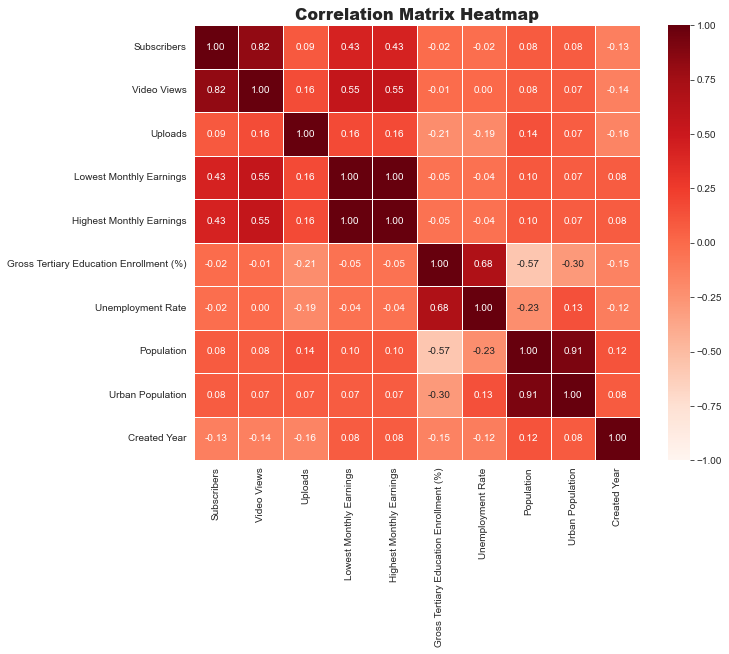

In [53]:
plt.figure(figsize= (10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sb.heatmap(correlation, annot= True,
           cmap= 'Reds',
           vmin= -1, vmax= 1,
           linecolor = 'white', linewidths = 0.5,
           fmt = '.2f'
           )
plt.show()

In [54]:
select_columns = ['Youtuber', 'Subscribers', 'Video Views', 'Uploads']

#Filter dataframe by select_columns
youtube_corr_statistics = youtube[select_columns]

#Convert 'Subscriber' in millions
youtube_corr_statistics['Subscribers (million)'] = (youtube_corr_statistics['Subscribers'] / 1000000).astype('int')

#Convert 'Video Views' in millions
youtube_corr_statistics['Video Views (billion)'] = (youtube_corr_statistics['Video Views'] / 1000000000).astype('int')

#Convert 'Uploads' in thousand
youtube_corr_statistics['Uploads (k.)'] = (youtube_corr_statistics['Uploads'] / 1000)

youtube_corr_statistics = youtube_corr_statistics[['Youtuber', 'Subscribers (million)', 'Video Views (billion)', 'Uploads (k.)' ]]

#Show dataframe
youtube_corr_statistics.head()


,Youtuber,Subscribers (million),Video Views (billion),Uploads (k.)
0,T-Series,245,228,20.082
1,MrBeast,166,28,0.741
2,Cocomelon - Nursery Rhymes,162,164,0.966
3,SET India,159,148,116.536
4,Kids Diana Show,112,93,1.111


In [55]:
youtube_corr_statistics['Video Views (billion)'].mean()

10.711180124223603

In [56]:
youtube_corr_statistics['Subscribers (million)'].mean()

22.27225672877847

In [57]:
per_subs = round(np.percentile(youtube_corr_statistics['Subscribers (million)'], 95))
per_views = round(np.percentile(youtube_corr_statistics['Video Views (billion)'], 95))

print('95% of YouTube channels have subscribers below:', per_subs, 'million')
print('95% of YouTube channels have video views below:', per_views, 'billion')

95% of YouTube channels have subscribers below: 46 million
95% of YouTube channels have video views below: 28 billion


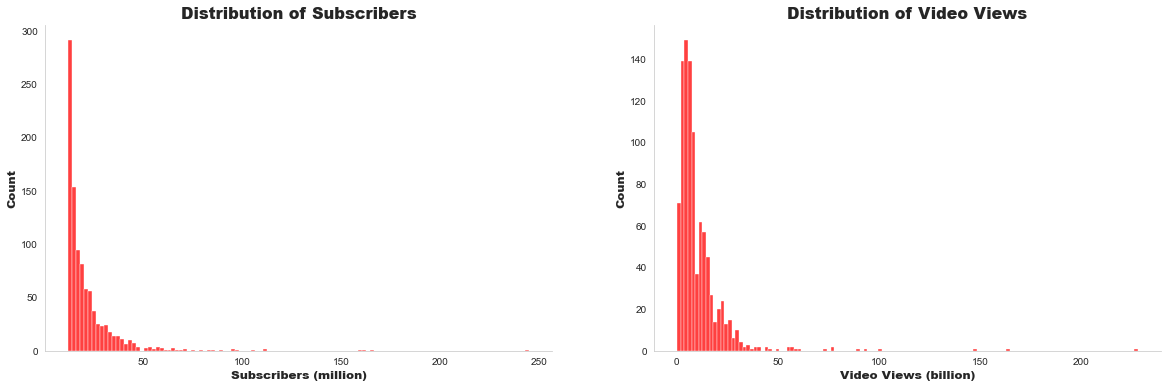

In [58]:
sb.set_style("whitegrid",{'axes.grid' : False})
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,6))
sb.histplot(youtube_corr_statistics['Subscribers (million)'], color= 'red',ax = ax1)
ax1.set_title('Distribution of Subscribers', fontweight = 'heavy', fontsize = 16)
ax1.set_xlabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
ax1.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

sb.histplot(youtube_corr_statistics['Video Views (billion)'], color= 'red', ax = ax2)
ax2.set_title('Distribution of Video Views', fontweight = 'heavy', fontsize = 16)
ax2.set_xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
ax2.set_ylabel('Count', fontweight = 'heavy', fontsize = 12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)

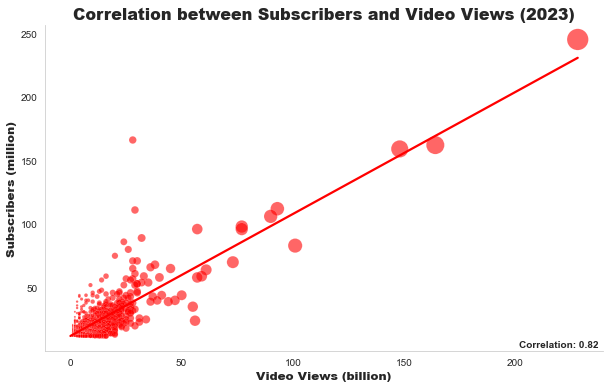

In [59]:
correlation = youtube_corr_statistics['Subscribers (million)'].corr(youtube_corr_statistics['Video Views (billion)'])

# Set scaling factor of circle size
scaling_factor = 2 

# Calculate the size of circles 
sizes = youtube_corr_statistics['Video Views (billion)'] * scaling_factor

# Chart
plt.figure(figsize= (10,6))
plt.title('Correlation between Subscribers and Video Views (2023)', fontweight = 'heavy', fontsize = 16 )
sb.scatterplot(data= youtube_corr_statistics, x='Video Views (billion)', y='Subscribers (million)', color = 'red',alpha=0.6, s = sizes)
sb.regplot(data= youtube_corr_statistics,  x='Video Views (billion)', y='Subscribers (million)', scatter=False, ci=None,line_kws={"color": "red"})
plt.xlabel('Video Views (billion)', fontweight = 'heavy', fontsize = 12)
plt.ylabel('Subscribers (million)', fontweight = 'heavy', fontsize = 12)
# plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

sb.despine(left=False, bottom=False)
plt.grid(axis = 'y', linestyle ='')
# Note correlation
plt.annotate(f'Correlation: {correlation:.2f}', 
             xy = (0.85, 0.01), 
             xycoords = 'axes fraction', 
             fontsize = 10, 
             weight = 'bold')
plt.show()

In [60]:
youtube.to_csv('Global_Youtube_Statistics_2023.csv', index = False)